In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn

In [2]:
image = cv2.cvtColor(cv2.imread("Input\image13.jpeg"), cv2.COLOR_BGR2RGB)
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.equalizeHist(gray)

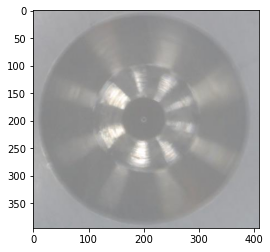

In [7]:
edges = cv2.Canny(gray, 100, 200)

plt.figure()
plt.imshow(image)

(50, 3)


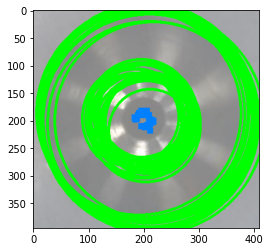

In [6]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 1)

if circles is not None:
    output = image.copy()
    circles = np.round(circles[0, :]).astype('int')
    circles = circles[np.where((circles[:, 0] > 180) & (circles[:, 0] < 220))]
    circles = circles[np.where((circles[:, 1] > 180) & (circles[:, 1] < 220))]


    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    print(circles.shape)
    plt.figure()
    plt.imshow(output)

[201.5     197.875    88.40625]
[207.55555556 194.         192.16666667]


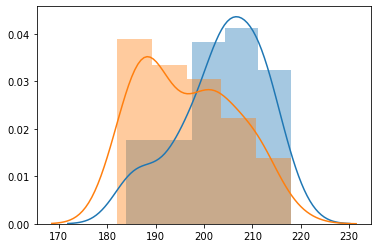

In [25]:
seaborn.distplot(circles[:, 0], 5)
seaborn.distplot(circles[:, 1], 5)
# seaborn.distplot(circles[:, 2], 5)
print(circles[np.where(circles[:, 2] < 150)].mean(axis=0))
print(circles[np.where(circles[:, 2] > 150)].mean(axis=0))

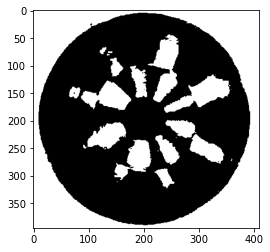

In [31]:
_, thresh = cv2.threshold(gray, 150, 255, 0)
plt.figure()
plt.imshow(thresh, 'gray')

In [32]:
contours, _ = cv2.findContours(thresh, 1, 2)

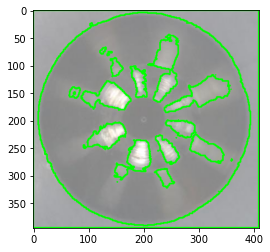

In [33]:
tmp = image.copy()
cv2.drawContours(tmp, contours, -1, (0, 255, 0), 2)
plt.figure()
plt.imshow(tmp)

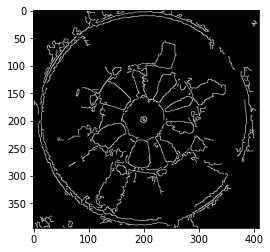

In [34]:
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.figure()
plt.imshow(edges, 'gray')